In [1]:
# 必要なライブラリのインポート
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import numpy as np

iris = datasets.load_iris()
# Petal Length(花びらの長さ), Petal Width(花びらの幅)の取得
X = iris.data[:, [2, 3]]
# クラスラベルの取得
y = iris.target
# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [2]:
# データの最小値、最大値を計算
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# meshgridメソッドで、2つの配列を作る
x_axis, y_axis = np.meshgrid(np.arange(X_min, X_max, 0.02), 
                             np.arange(y_min, y_max, 0.02))

print(x_axis.shape)
# →(220, 395)
print(y_axis.shape)
# →(220, 395)

# x_axisとy_axisの要素を1行にまとめるために組み合わせの数を計算
data_num = x_axis.shape[0] * x_axis.shape[1]
print(data_num)
# →86900

# 2つの1次元配列を組み合わせて2次元配列を作成
grid_points = np.concatenate((x_axis.reshape(data_num, 1), y_axis.reshape(data_num, 1)), axis=1)
print(grid_points.shape)
# →(86900, 2)

(220, 395)
(220, 395)
86900
(86900, 2)


In [3]:
## ライブラリの読み込み
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 深さを「3」にします。
tree = DecisionTreeClassifier(max_depth=3, random_state=0)


In [5]:
# トレーニングデータセットを適合させる
tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [6]:
# predictメソッドを使い予測する
pred_label = tree.predict(grid_points)

In [7]:
# reshapeメソッドで、行列数を変換する
pred_label = pred_label.reshape(x_axis.shape)

print(pred_label.shape)
# →(220, 395)

(220, 395)


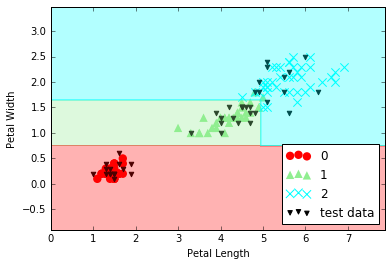

In [8]:


# 可視化に必要なライブラリをインポート
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# マーカーの準備
markers = ('o', '^', 'x')

# 色を用意
colors = ('red', 'lightgreen', 'cyan')
# 指定した数の色を使ったmapを作図
cmap = ListedColormap(colors)

for i, n in enumerate(np.unique(y)):
    plt.scatter(x=X_train[y_train == n, 0],
                y=X_train[y_train == n, 1],
                c=cmap(i),
                marker=markers[i],
                s = 70,
                edgecolors='',
                label=n)

plt.scatter(X_test[:, 0],
            X_test[:, 1],
            c='k',
            marker='v',
            label='test data')

plt.xlim(x_axis.min(), x_axis.max())
plt.ylim(y_axis.min(), y_axis.max())
# contourfメソッドを使って、領域を塗りつぶす
plt.contourf(x_axis, y_axis, pred_label, alpha=0.3, cmap=cmap)

# 凡例
plt.legend(loc='lower right')

# 軸ラベル
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(tree,
                                                   class_names=['Setosa','Versicolor', 'Virginica'],
                                                   feature_names=['petal length', 'petal width'])

!dot -T png tree.dot -o tree.png